In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('laptop_data.xlsx')
data

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [4]:
data.duplicated().sum()

0

In [5]:
data.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [6]:
data.drop(columns=['Unnamed: 0'],inplace=True)
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [7]:
data['Ram'] = data['Ram'].str.replace('GB','').astype('int32')
data['Weight'] = data['Weight'].str.replace('kg','').astype('float32')
data['Price'] = data['Price'].astype(int)

In [8]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   int32  
dtypes: float32(1), float64(1), int32(2), object(7)
memory usage: 96.8+ KB


In [10]:
data['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [11]:
data['TypeName'].unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

In [12]:
data['Inches'].unique()

array([13.3, 15.6, 15.4, 14. , 12. , 11.6, 17.3, 10.1, 13.5, 12.5, 13. ,
       18.4, 13.9, 12.3, 17. , 15. , 14.1, 11.3])

In [13]:
data['ScreenResolution'].unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

In [14]:
data['Cpu'].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

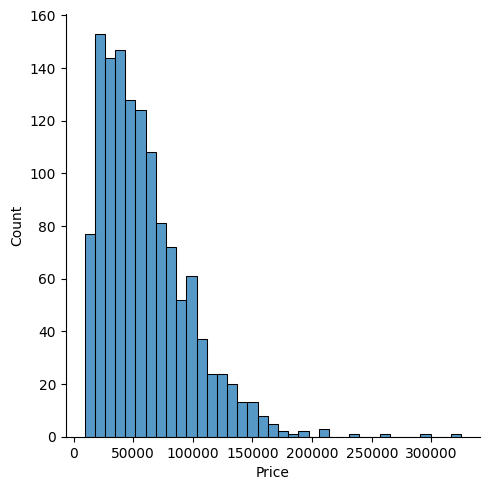

In [15]:
import seaborn as sns
sns.displot(data['Price'])

<Axes: xlabel='Company'>

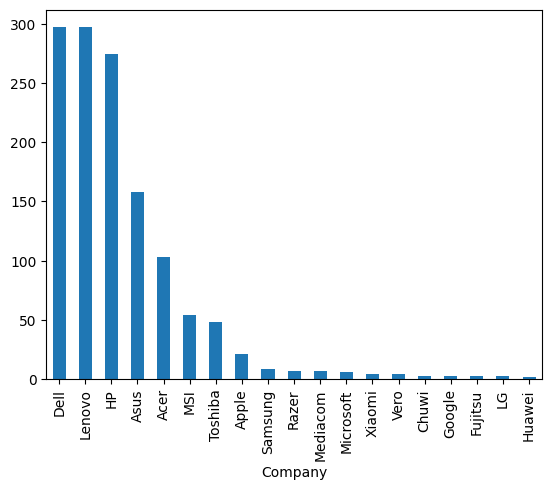

In [16]:
data['Company'].value_counts().plot(kind='bar')

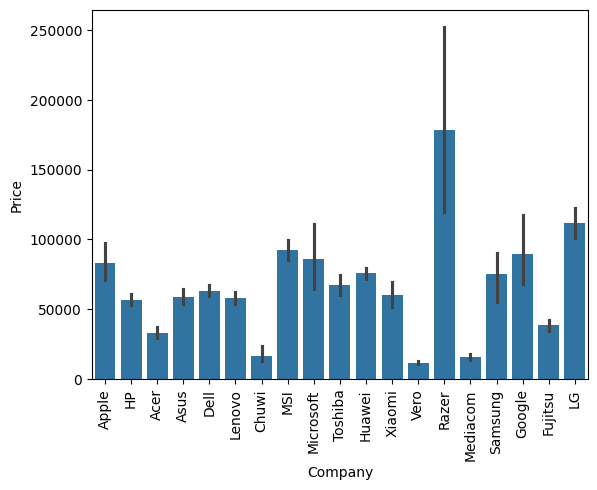

In [17]:
sns.barplot(x=data['Company'],y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='TypeName'>

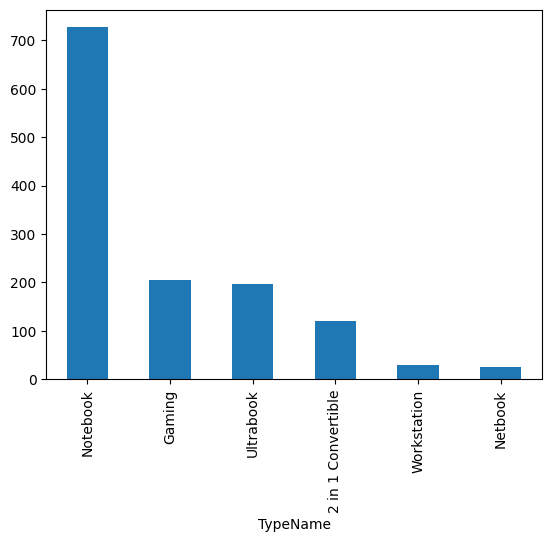

In [18]:
data['TypeName'].value_counts().plot(kind='bar')

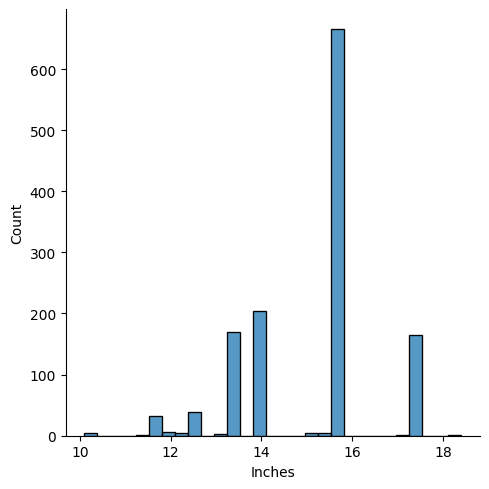

In [19]:
sns.displot(data['Inches'])

In [20]:
data['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [21]:
data['Touchscreen']=data['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [22]:
data.sample(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
1165,Dell,Gaming,15.6,4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.62,79813,0
1291,Acer,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4,500GB HDD,Intel HD Graphics 400,Linux,2.40,15397,0
307,Toshiba,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,8,256GB SSD,Nvidia GeForce 930M,Windows 10,2.20,55571,0
884,Dell,Notebook,15.6,1366x768,Intel Pentium Quad Core N3710 1.6GHz,4,500GB HDD,Intel HD Graphics,Windows 10,2.20,19660,0
911,HP,Ultrabook,12.5,4K Ultra HD / Touchscreen 3840x2160,Intel Core M 6Y75 1.2GHz,8,240GB SSD,Intel HD Graphics 515,Windows 10,1.09,165168,1
1170,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.96,36177,0
707,Lenovo,Workstation,15.6,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Nvidia Quadro M520M,Windows 7,2.18,98834,0
410,Lenovo,Workstation,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,512GB SSD,Nvidia Quadro M1200,Windows 10,2.67,102564,0
1261,Asus,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core M 6Y30 0.9GHz,8,512GB SSD,Intel HD Graphics 515,Windows 10,1.20,38841,0
914,Acer,Notebook,15.6,Full HD 1920x1080,Intel Core i3 7100U 2.4GHz,4,1TB HDD,Intel HD Graphics 620,Windows 10,2.40,26586,0


<Axes: xlabel='Touchscreen'>

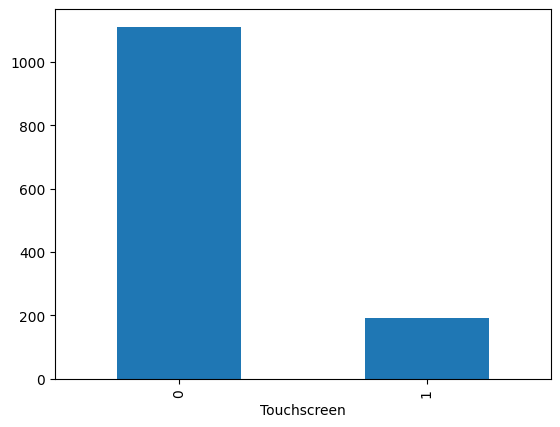

In [23]:
data['Touchscreen'].value_counts().plot(kind='bar')

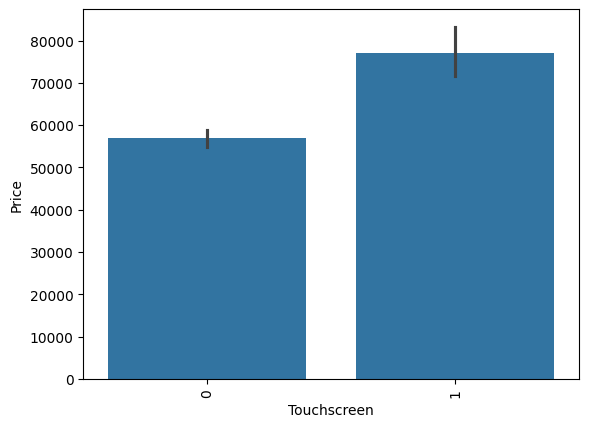

In [24]:
sns.barplot(x=data['Touchscreen'],y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [25]:
data['IPS']=data['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [26]:
data.sample(6)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS
1090,Dell,Notebook,15.6,1366x768,Intel Pentium Quad Core N3700 1.6GHz,4,500GB HDD,Intel HD Graphics,Linux,2.20,20965,0,0
61,Dell,Ultrabook,14.0,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.70,46833,0,0
124,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,256GB SSD,AMD Radeon R5,Windows 10,2.10,24029,0,0
1142,HP,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.48,86793,1,0
233,Dell,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.60,45767,0,0
152,Lenovo,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4,128GB SSD,Intel HD Graphics 620,Windows 10,1.90,26533,0,0


<Axes: xlabel='IPS'>

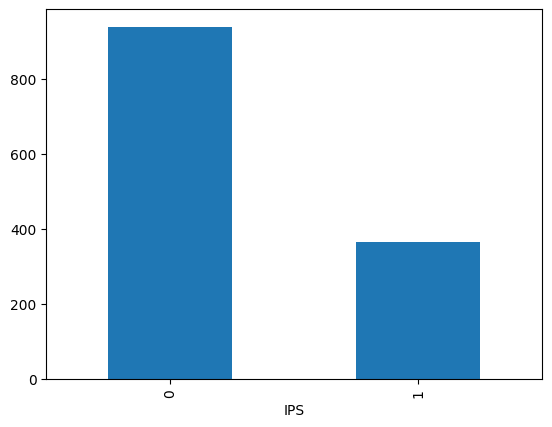

In [27]:
data['IPS'].value_counts().plot(kind='bar')

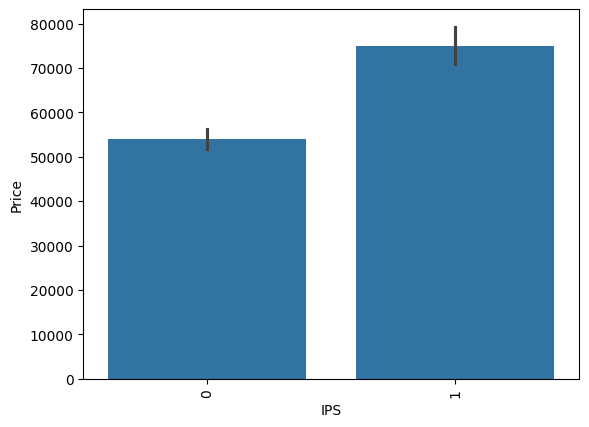

In [28]:
sns.barplot(x=data['IPS'],y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [29]:
new=data['ScreenResolution'].str.split('x',n=1,expand = True)

In [30]:
data['x_res'] = new[0]
data['y_res'] = new[1]
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1,IPS Panel Retina Display 2560,1600


In [31]:
data['x_res'] = data['x_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [32]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1,2560,1600


In [33]:
# we wrote these two lines cause x_res and y_res are still strings and we will have to convert it to numeric type to perform arithimetic operations
data['x_res'] = data['x_res'].str.replace(',', '').str.findall(r'(\d+\.?\d+)').apply(lambda x: x[0]).astype(float)
data['y_res'] = data['y_res'].str.replace(',', '').str.findall(r'(\d+\.?\d+)').apply(lambda x: x[0]).astype(float)

data['ppi'] = (((data['x_res']**2) + (data['y_res']**2))**0.5 / data['Inches']).astype(float)


In [34]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,x_res,y_res,ppi
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1,2560.0,1600.0,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0,1440.0,900.0,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,1920.0,1080.0,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,0,1,2880.0,1800.0,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1,2560.0,1600.0,226.983005


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   int32  
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  x_res             1303 non-null   float64
 14  y_res             1303 non-null   float64
 15  ppi               1303 non-null   float64
dtypes: float32(1), float64(4), int32(2), int64

In [36]:
data.drop(columns=['ScreenResolution','Inches','x_res','y_res'],inplace=True)

In [37]:
data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1,226.983005


In [38]:
data['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [39]:
data['Cpu Name'] = data['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [40]:
data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1,226.983005,Intel Core i5


In [41]:
def fetch_processor(text):
    if text == 'Intel Core i5' or text == 'Intel Core i7' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [42]:
data['Cpu brand'] = data['Cpu Name'].apply(fetch_processor)
data.sample(7)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu Name,Cpu brand
458,Microsoft,Ultrabook,Intel Core i7 7660U 2.5GHz,8,256GB SSD,Intel Iris Plus Graphics 640,Windows 10 S,1.25,95850,1,0,200.842560,Intel Core i7,Intel Core i7
305,Lenovo,Notebook,Intel Pentium Quad Core N4200 1.1GHz,4,1TB HDD,Intel HD Graphics 505,No OS,2.20,19180,0,0,100.454670,Intel Pentium Quad,Other Intel Processor
996,HP,Ultrabook,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.11,71874,1,1,165.632118,Intel Core i7,Intel Core i7
626,Mediacom,Notebook,Intel Atom x5-Z8350 1.44GHz,2,32GB Flash Storage,Intel HD Graphics,Windows 10,1.40,12733,0,0,157.350512,Intel Atom x5-Z8350,Other Intel Processor
952,Toshiba,Notebook,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.20,77788,0,0,165.632118,Intel Core i5,Intel Core i5
38,HP,Notebook,Intel Core i5 7200U 2.5GHz,4,1TB HDD,Intel HD Graphics 620,Windows 10,1.86,26037,0,0,100.454670,Intel Core i5,Intel Core i5
80,Dell,Ultrabook,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.88,58403,0,1,141.211998,Intel Core i5,Intel Core i5


<Axes: xlabel='Cpu brand'>

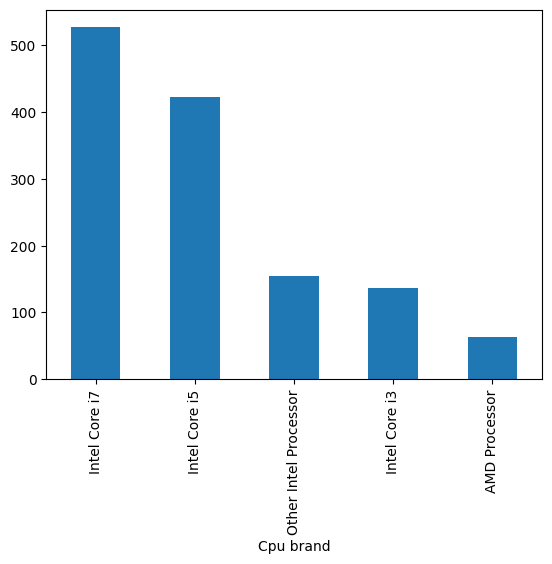

In [43]:
data['Cpu brand'].value_counts().plot(kind='bar')

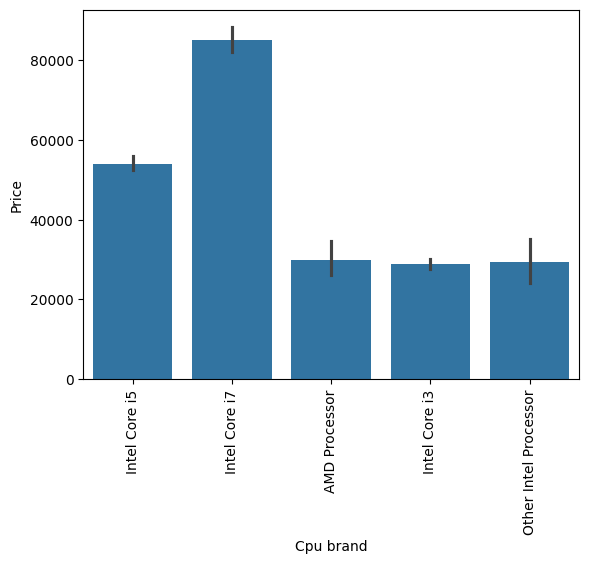

In [44]:
sns.barplot(x=data['Cpu brand'],y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [45]:
data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu Name,Cpu brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1,226.983005,Intel Core i5,Intel Core i5


In [46]:
data.drop(columns=['Cpu','Cpu Name'],inplace=True)
data.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1,226.983005,Intel Core i5


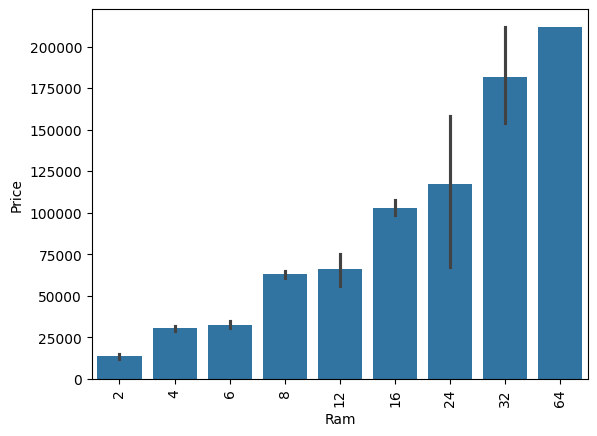

In [47]:
sns.barplot(x=data['Ram'],y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [48]:
data['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [49]:
data['Memory'] = data['Memory'].astype(str).replace(r'\.0', '', regex=True)
data["Memory"] = data["Memory"].str.replace('GB', '')
data["Memory"] = data["Memory"].str.replace('TB', '000')

# Splitting the 'Memory' column
new = data["Memory"].str.split("+", n=1, expand=True)

# Create 'first' and 'second' columns
data["first"] = new[0].str.strip()
data["second"] = new[1].fillna("0").str.strip()

# Identify storage types in 'first'
data["Layer1HDD"] = data["first"].apply(lambda x: 1 if "HDD" in x else 0)
data["Layer1SSD"] = data["first"].apply(lambda x: 1 if "SSD" in x else 0)
data["Layer1Hybrid"] = data["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
data["Layer1Flash_Storage"] = data["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

# Remove non-digit characters from 'first'
data['first'] = data['first'].str.replace(r'\D', '', regex=True)

# Identify storage types in 'second'
data["Layer2HDD"] = data["second"].apply(lambda x: 1 if "HDD" in x else 0)
data["Layer2SSD"] = data["second"].apply(lambda x: 1 if "SSD" in x else 0)
data["Layer2Hybrid"] = data["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
data["Layer2Flash_Storage"] = data["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

# Remove non-digit characters from 'second'
data['second'] = data['second'].str.replace(r'\D', '', regex=True)

# Convert 'first' and 'second' to integers
data["first"] = data["first"].astype(int)
data["second"] = data["second"].astype(int)

# Calculate total storage for each type
data["HDD"] = (data["first"] * data["Layer1HDD"] + data["second"] * data["Layer2HDD"])
data["SSD"] = (data["first"] * data["Layer1SSD"] + data["second"] * data["Layer2SSD"])
data["Hybrid"] = (data["first"] * data["Layer1Hybrid"] + data["second"] * data["Layer2Hybrid"])
data["Flash_Storage"] = (data["first"] * data["Layer1Flash_Storage"] + data["second"] * data["Layer2Flash_Storage"])

data.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage','Memory','Hybrid','Flash_Storage'],inplace=True)

In [50]:
data.sample(7)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD
1224,Dell,2 in 1 Convertible,4,Intel HD Graphics 620,Windows 10,2.08,27119,1,0,146.860478,Intel Core i3,500,0
1210,Apple,Ultrabook,8,Intel HD Graphics 515,Mac OS X,0.92,68145,0,1,226.415547,Other Intel Processor,0,0
1197,Asus,Gaming,16,Nvidia GeForce GTX 980M,Windows 10,4.30,114552,0,1,127.335675,Intel Core i7,1000,512
406,Toshiba,Ultrabook,16,Intel HD Graphics 520,Windows 10,1.20,93080,0,0,165.632118,Intel Core i7,0,512
919,MSI,Gaming,8,Nvidia GeForce GTX 1050,Windows 10,2.20,59668,0,0,141.211998,Intel Core i5,1000,128
496,Lenovo,Notebook,8,Intel UHD Graphics 620,Windows 10,2.17,47893,0,0,141.211998,Intel Core i7,0,256
1302,Asus,Notebook,4,Intel HD Graphics,Windows 10,2.20,19660,0,0,100.454670,Other Intel Processor,500,0


In [51]:
data['Gpu brand'] = data['Gpu'].apply(lambda x:x.split()[0])
data.sample(7)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand
94,Asus,Ultrabook,8,Intel HD Graphics 620,Windows 10,1.25,55890,0,0,157.350512,Intel Core i7,0,256,Intel
385,Lenovo,Ultrabook,8,Intel HD Graphics 620,Windows 10,1.13,121584,0,1,209.800683,Intel Core i7,0,512,Intel
564,Asus,Notebook,8,Nvidia GeForce GTX 1050,Windows 10,2.50,44701,0,0,141.211998,Intel Core i5,1000,128,Nvidia
291,Asus,Gaming,8,Nvidia GeForce GTX 1050,Windows 10,3.00,63243,0,0,127.335675,Intel Core i7,1000,0,Nvidia
1240,Lenovo,Notebook,6,AMD Radeon 530,Windows 10,2.20,31838,0,0,141.211998,AMD Processor,0,256,AMD
1113,HP,Ultrabook,8,Intel HD Graphics 520,Windows 10,1.16,104908,0,0,165.632118,Intel Core i7,0,512,Intel
916,HP,Notebook,8,Intel HD Graphics 620,Windows 10,1.49,51148,0,0,165.632118,Intel Core i5,0,256,Intel


In [52]:
data = data[data['Gpu brand'] != 'ARM']
data['Gpu brand'].value_counts()

Gpu brand
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64

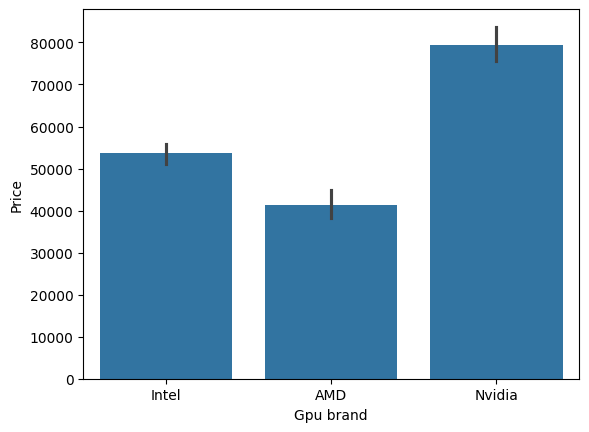

In [53]:
sns.barplot(x=data['Gpu brand'],y=data['Price'])
plt.show()

In [54]:
data.drop(columns=['Gpu'],inplace=True)

C:\Users\dhruv\AppData\Local\Temp\ipykernel_17656\2462585147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['Gpu'],inplace=True)


In [55]:
data.sample(7)

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand
804,Dell,Netbook,4,Windows 10,1.63,39640,0,0,135.094211,Other Intel Processor,0,128,Intel
744,Lenovo,Workstation,16,Windows 10,2.50,175770,0,1,282.423996,Intel Core i7,0,1000,Nvidia
909,LG,Ultrabook,8,Windows 10,0.98,101178,1,1,157.350512,Intel Core i7,0,512,Intel
990,HP,Netbook,8,Windows 10,0.97,101658,0,0,176.232574,Other Intel Processor,0,512,Intel
160,Asus,Notebook,4,Windows 10,2.03,21471,0,0,100.454670,AMD Processor,1000,0,AMD
446,Acer,Notebook,4,Linux,2.40,23539,0,0,100.454670,Intel Core i5,500,0,Intel
686,HP,Notebook,4,Windows 10,1.86,32639,0,0,100.454670,Intel Core i5,500,0,AMD


In [56]:
data['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

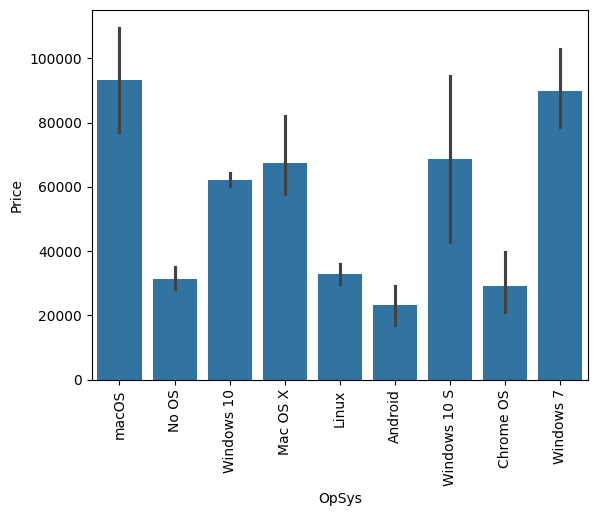

In [57]:
sns.barplot(x=data['OpSys'],y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [58]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Other/Linux/No OS'

In [59]:
data['os'] = data['OpSys'].apply(cat_os)
data.drop(columns=['OpSys'],inplace=True)

C:\Users\dhruv\AppData\Local\Temp\ipykernel_17656\2385295990.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['os'] = data['OpSys'].apply(cat_os)
C:\Users\dhruv\AppData\Local\Temp\ipykernel_17656\2385295990.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['OpSys'],inplace=True)


In [60]:
data.sample(11)

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand,os
439,Asus,Notebook,4,2.00,29783,0,0,141.211998,Intel Core i5,0,256,Intel,Other/Linux/No OS
1056,HP,Notebook,4,1.96,26586,0,0,100.454670,Intel Core i5,500,0,Intel,Other/Linux/No OS
703,Lenovo,Notebook,4,2.10,33110,0,0,141.211998,Intel Core i5,2000,0,Intel,windows
894,MSI,Gaming,16,2.43,141138,0,1,254.671349,Intel Core i7,2000,512,Nvidia,windows
1268,HP,Netbook,2,1.17,11135,0,0,135.094211,Other Intel Processor,0,0,Intel,windows
947,Lenovo,Notebook,8,2.20,36496,0,0,141.211998,Intel Core i7,1000,0,Nvidia,Other/Linux/No OS
836,Asus,Gaming,16,2.90,128884,0,0,127.335675,Intel Core i7,1000,256,Nvidia,windows
423,Asus,Notebook,8,2.30,31808,0,0,141.211998,Intel Core i3,1000,0,Nvidia,Other/Linux/No OS
213,Lenovo,Notebook,8,2.20,29250,0,0,141.211998,Intel Core i5,0,256,Intel,Other/Linux/No OS
1003,HP,Notebook,4,1.64,41505,0,0,111.935204,Intel Core i5,500,0,Intel,windows


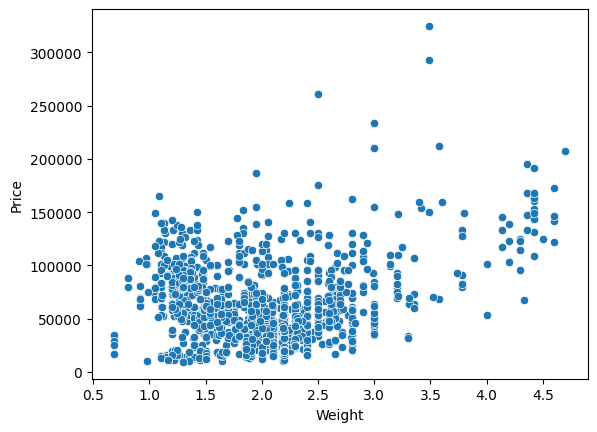

In [61]:
sns.scatterplot(x=data['Weight'],y=data['Price'])
plt.show()

C:\Users\dhruv\AppData\Local\Temp\ipykernel_17656\460424880.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(data['Price']))


<Axes: xlabel='Price', ylabel='Density'>

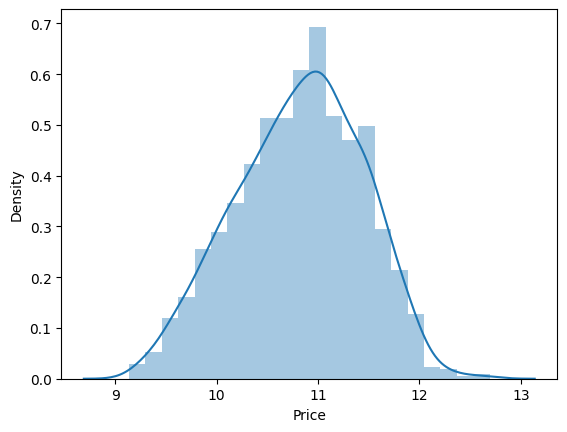

In [62]:
sns.distplot(np.log(data['Price']))

In [63]:
x = data.drop(columns=['Price'])
y = np.log(data['Price'])

In [64]:
x

,Company,TypeName,Ram,Weight,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Other/Linux/No OS
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,windows


In [65]:
y

0       11.175745
1       10.776766
2       10.329931
3       11.814473
4       11.473093
          ...    
1298    10.433880
1299    11.288106
1300     9.409273
1301    10.614106
1302     9.886341
Name: Price, Length: 1302, dtype: float64

In [70]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [67]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [69]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2, random_state=6227)

# Linear Regression

In [72]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = LinearRegression()
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
# scores.append(r2_score(y_test,y_pred))
print("r2 Score ",r2_score(y_test,y_pred))
print("MAE Score ",mean_absolute_error(y_test,y_pred))
# print(scores[np.argmax(scores)])
# print(np.argmax(scores))

r2 Score  0.8777441642057956
MAE Score  0.1802572783217848


# Ridge Regression

In [74]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Ridge(alpha=10)
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print("r2 Score ",r2_score(y_test,y_pred))
print("MAE Score ",mean_absolute_error(y_test,y_pred))

r2 Score  0.8639472376520967
MAE Score  0.19083370351799311


# KNN

In [76]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print("r2 Score ",r2_score(y_test,y_pred))
print("MAE Score ",mean_absolute_error(y_test,y_pred))

r2 Score  0.8204786256330097
MAE Score  0.20932967042089515


# Decision Tree

In [77]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print("r2 Score ",r2_score(y_test,y_pred))
print("MAE Score ",mean_absolute_error(y_test,y_pred))

r2 Score  0.8449614909195831
MAE Score  0.19125307994581403


# SVM

In [78]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print("r2 Score ",r2_score(y_test,y_pred))
print("MAE Score ",mean_absolute_error(y_test,y_pred))

r2 Score  0.7903736139275606
MAE Score  0.1944285006949698


# Random Forest

In [79]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15
                                )
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print("r2 Score ",r2_score(y_test,y_pred))
print("MAE Score ",mean_absolute_error(y_test,y_pred))

r2 Score  0.910650195727257
MAE Score  0.14888758885842143


# Extra Tree

In [80]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = ExtraTreesRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=None,
                              max_features=0.75,
                              max_depth=15
                                )
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print("r2 Score ",r2_score(y_test,y_pred))
print("MAE Score ",mean_absolute_error(y_test,y_pred))

r2 Score  0.9067889597080929
MAE Score  0.15315984495533805


# AdaBoost

In [81]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15,
                         learning_rate=1.0)
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print("r2 Score ",r2_score(y_test,y_pred))
print("MAE Score ",mean_absolute_error(y_test,y_pred))

r2 Score  0.8119529033574752
MAE Score  0.23159070787263059


# Gradient Boost

In [82]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=100)
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print("r2 Score ",r2_score(y_test,y_pred))
print("MAE Score ",mean_absolute_error(y_test,y_pred))

r2 Score  0.9018963174969327
MAE Score  0.15590233808312048


# XgBoost

In [83]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = XGBRegressor(max_depth=5,learning_rate=0.5)
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print("r2 Score ",r2_score(y_test,y_pred))
print("MAE Score ",mean_absolute_error(y_test,y_pred))

r2 Score  0.908741877018749
MAE Score  0.14589567640511486


In [84]:
import pickle
pickle.dump(pipe, open('pipe.pkl','wb'))
pickle.dump(data, open('data.pkl', 'wb'))

In [85]:
data

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636,0,0,141.211998,Intel Core i5,0,256,Intel,Other/Linux/No OS
3,Apple,Ultrabook,16,1.83,135195,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,33992,1,1,157.350512,Intel Core i7,0,128,Intel,windows
1299,Lenovo,2 in 1 Convertible,16,1.30,79866,1,1,276.053530,Intel Core i7,0,512,Intel,windows
1300,Lenovo,Notebook,2,1.50,12201,0,0,111.935204,Other Intel Processor,0,0,Intel,windows
1301,HP,Notebook,6,2.19,40705,0,0,100.454670,Intel Core i7,1000,0,AMD,windows
